# **LOAN APPROVAL PREDICTION PROJECT**

**Project Objective**

The primary goal of this project is to predict whether a loan will be approved by a bank based on the applicant's information.

**Project Overview**

This project involves analyzing a dataset containing information about loan applicants. The main tasks include:

    1. Predict Loan Approval: Build a predictive model to estimate the likelihood of loan approval based on various applicant features.
    2. Factor Analysis: Identify and analyze the variables that significantly impact loan approval.

The dataset includes features such as loan ID, number of dependents, education level, employment status, income, loan amount, tenure, CIBIL score, and various asset values, with the final target being the loan status (Approved/Rejected)

In [ ]:
# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score


from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# mount drive
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# import dataset
df = pd.read_csv("https://raw.githubusercontent.com/Gladie34/iip/main/Capstone%20project.csv")

# Data Understanding

In [ ]:
pd.set_option('display.max_columns',None)#print all the columns
# view first few rows of the dataset
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# shape
df.shape

(4269, 13)

In [ ]:
#data size
df.size

55497

In [ ]:
#unique features in the the data
df.nunique()

,0
loan_id,4269
no_of_dependents,6
education,2
self_employed,2
income_annum,98
loan_amount,378
loan_term,10
cibil_score,601
residential_assets_value,278
commercial_assets_value,188


In [ ]:
# dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [ ]:
# summary of the dataset
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [ ]:
# Display all column names
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

# Data cleaning

In [ ]:
# Remove all whitespaces from column names
df.columns = df.columns.str.replace(' ', '')
# Display all column names after the update
df.columns


Index(['loan_id', 'no_of_dependents', 'education', 'self_employed',
       'income_annum', 'loan_amount', 'loan_term', 'cibil_score',
       'residential_assets_value', 'commercial_assets_value',
       'luxury_assets_value', 'bank_asset_value', 'loan_status'],
      dtype='object')

In [ ]:
# Check for missing values
df.isna().sum()

,0
loan_id,0
no_of_dependents,0
education,0
self_employed,0
income_annum,0
loan_amount,0
loan_term,0
cibil_score,0
residential_assets_value,0
commercial_assets_value,0


No missing values

In [ ]:
# Check for duplicates
duplicates = df.duplicated().sum()

# Percentage of duplicated data
percentage = df.duplicated().sum() / df.shape[0] * 100

print(f'{duplicates} rows contain duplicates amounting to {percentage.round(2)}% of the total data.')

0 rows contain duplicates amounting to 0.0% of the total data.


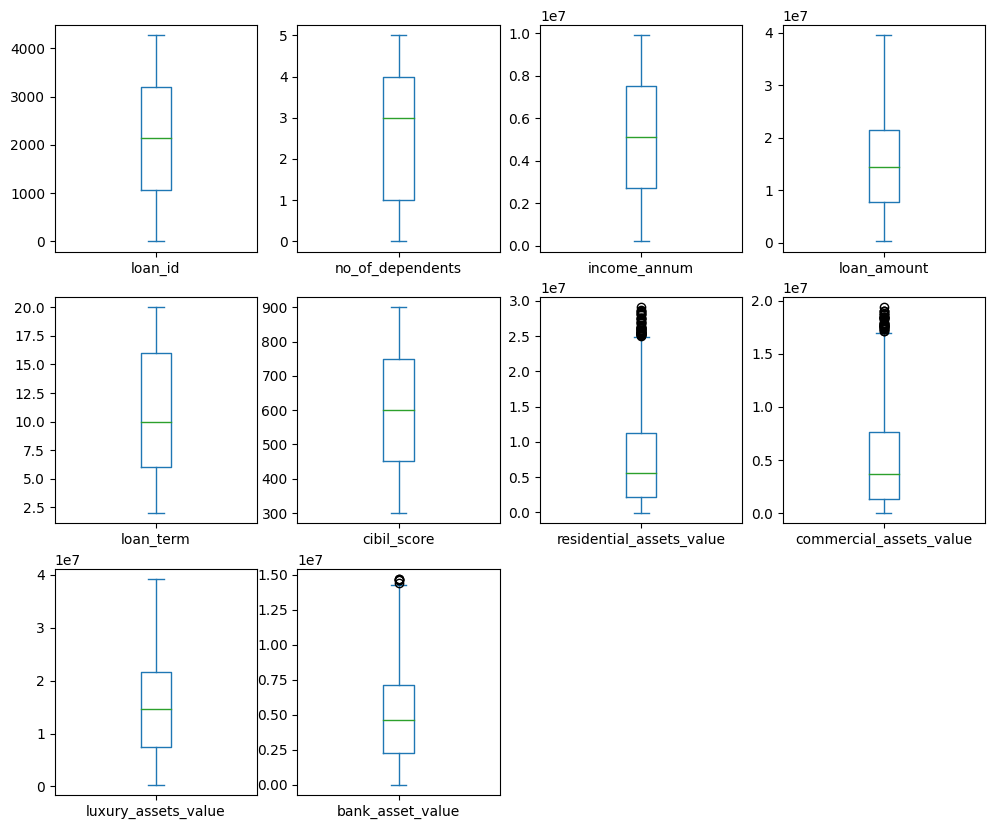

In [ ]:
#outlier detection
df.plot(kind='box',figsize=(12,10),layout=(3,4),subplots=True)

plt.show()

**Interpretation**

We can see outliers in  bank_asset_value,residential_assets_value and commercial_asset_value

<Axes: xlabel='commercial_assets_value', ylabel='Count'>

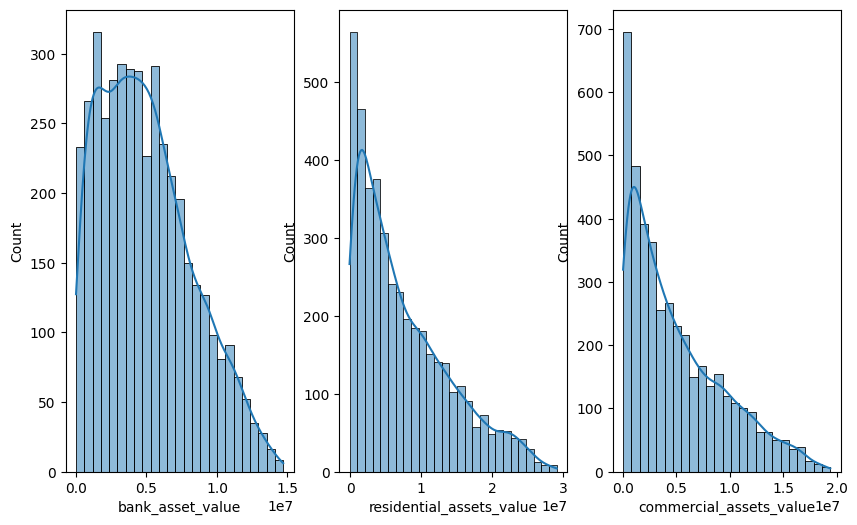

In [ ]:
#visual presentation of the feature with outliers
plt.figure(figsize=(10,6))
plt.subplot(1,3,1)
sns.histplot(df['bank_asset_value'],kde=True)
plt.subplot(1,3,2)
sns.histplot(df['residential_assets_value'],kde=True)
plt.subplot(1,3,3)
sns.histplot(df['commercial_assets_value'],kde=True)

**Interpretation**

**bank_asset_value:** The distribution is heavily skewed to the right, indicating a concentration of lower values with a long tail of very high values. This suggests the presence of outliers on the higher end, which could be due to a few individuals or entities with significantly larger bank assets.

**residential_assets_value:** Similar to bank assets, the distribution is right-skewed, indicating a majority of individuals with lower residential asset values and a smaller group with very high values. Outliers are likely present in this feature as well.

**commercial_assets_value:** This distribution also exhibits a right skew, suggesting a pattern of a few individuals or entities holding a large proportion of commercial assets. Outliers are likely present in this feature too.

**conclusion**

The extreme values here is likely because of  possibility of people having lots of money in the bank and also havng properties of high value

# Explolatory  Data Analysis

In [ ]:
df.describe()#Checking statistical summary of the numeric data

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Interpretation

**ApplicantIncome:** The average income of applicants is around 5403, but there's a large standard deviation, suggesting a wide range of incomes.

**CoapplicantIncome:** The average coapplicant income is around 1621, with a significant number of coapplicants having no income (indicated by the minimum value of 0).

**LoanAmount:** The average loan amount is around 146, with some loans being as small as 9 and others as large as 700.

**Loan_Amount_Term:** The average loan term is around 342 days, with most loans falling between 360 and 180 days.

**Credit_History:** Most applicants have a credit history (mean close to 1), but there's a portion with no credit history (minimum value of 0).



In [ ]:
df.describe(include='object')#checking  statistical summary of the categorical data

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


# Insight
 The **`education`** column shows that most individuals (2,144 out of 4,269) are graduates.

   **`self_employed`** category, 2,150 individuals are self-employed, slightly more than those who are not.
   
   The **`loan_status`** column indicates that 62% (2,656) of loans were approved.
   
#   conclusion
   This data suggests that a majority of the individuals in the dataset are educated and self-employed, with a relatively high loan approval rate, which could influence further analysis or decision-making processes.

# Univariate Analysis

Categorical variables

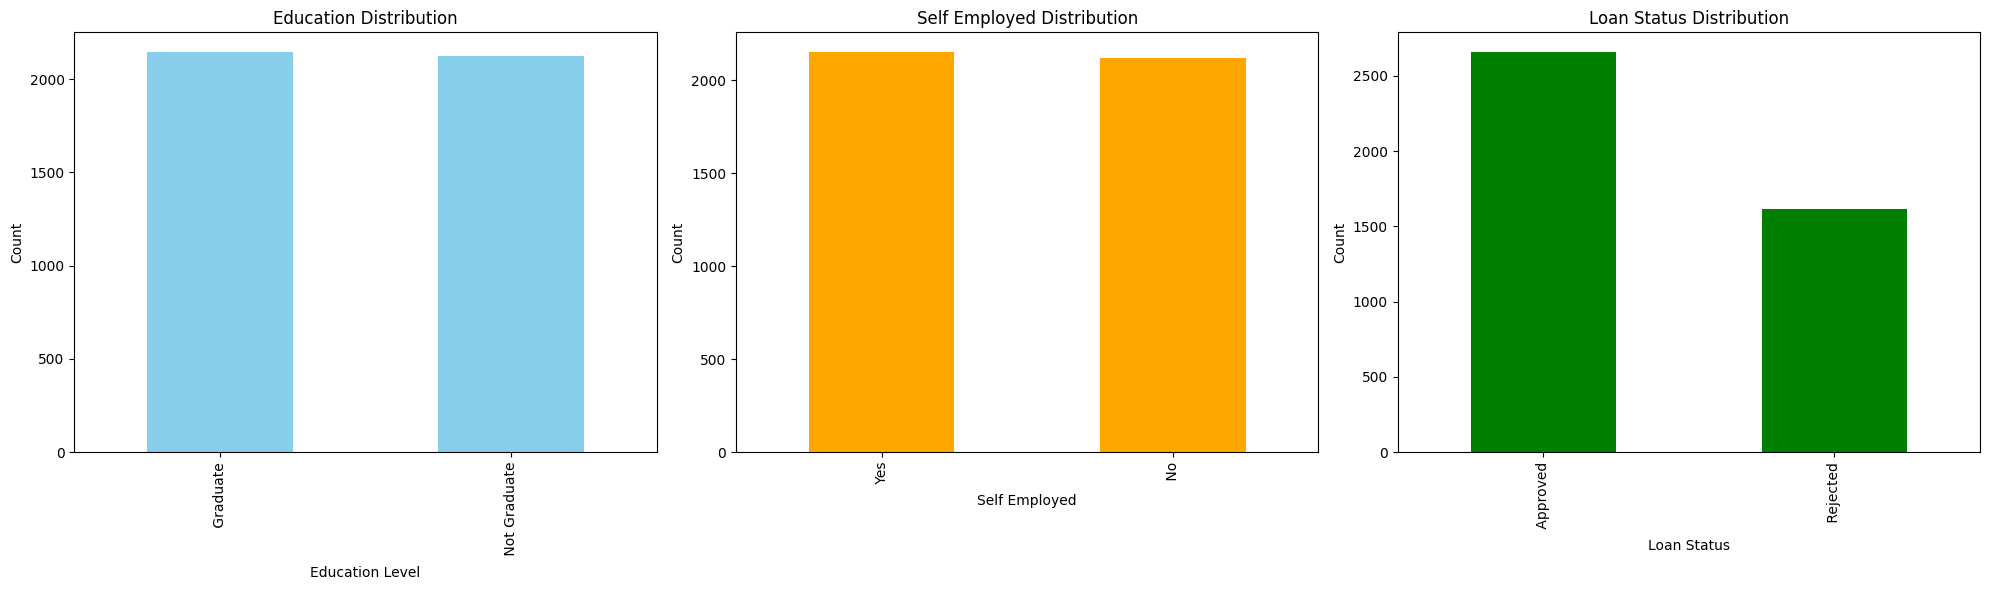

In [ ]:
plt.figure(figsize=(20,6))
#Education
plt.subplot(1,3,1)
df['education'].value_counts().plot(kind='bar', color='skyblue', title='Education Distribution')
plt.xlabel('Education Level')
plt.ylabel('Count')

# Self Employed
plt.subplot(1,3,2)
df['self_employed'].value_counts().plot(kind='bar', color='orange', title='Self Employed Distribution')
plt.xlabel('Self Employed')
plt.ylabel('Count')

# Loan Status
plt.subplot(1,3,3)
df['loan_status'].value_counts().plot(kind='bar', color='green', title='Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


**Interpretation**


 The bar chart for 'Education Distribution' shows that the majority of loan applicants are graduates.This indicates that a higher level of education among the applicant pool.


The 'Self Employed Distribution' bar chart reveals that a significant portion of applicants are self-employed,suggesting a potential focus on entrepreneurs or small business owners seeking loans.


The 'Loan Status Distribution' chart indicates a higher proportion of approved loans compared to rejected ones, implying a generally favorable loan approval rate within the dataset.

Numerical Analysis

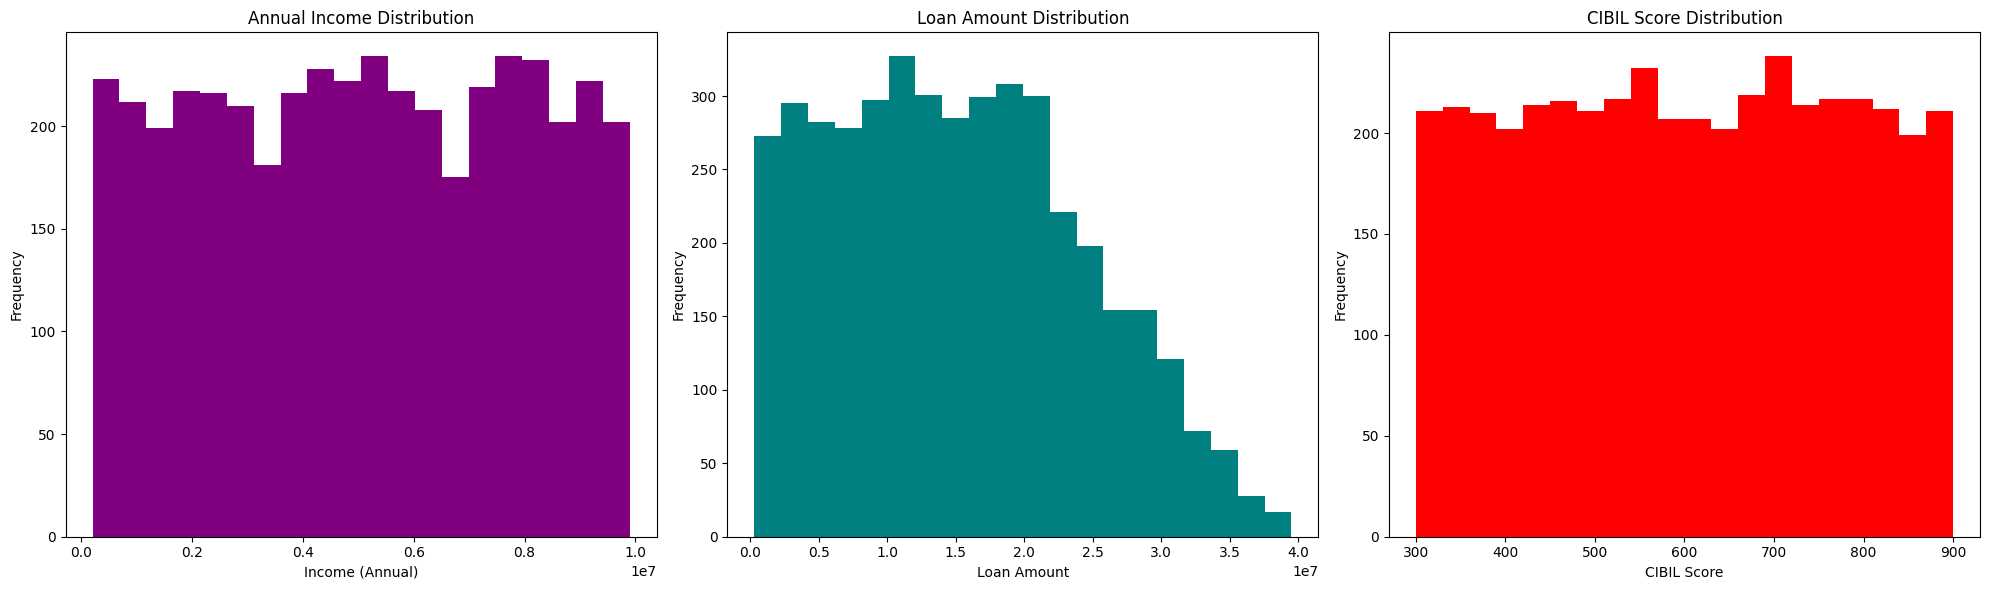

In [ ]:
plt.figure(figsize=(20,6))
# Income_annum
plt.subplot(1,3,1)
df['income_annum'].plot(kind='hist', bins=20, color='purple', title='Annual Income Distribution')
plt.xlabel('Income (Annual)')
plt.ylabel('Frequency')


# Loan_amount
plt.subplot(1,3,2)
df['loan_amount'].plot(kind='hist', bins=20, color='teal', title='Loan Amount Distribution')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')


# Cibil_score
plt.subplot(1,3,3)
df['cibil_score'].plot(kind='hist', bins=20, color='red',title='CIBIL Score Distribution')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


**Interpretation**

**Annual Income Distribution:** The histogram for 'Annual Income Distribution' suggests that the majority of loan applicants fall within a specific income range, with a potential skew towards lower to mid-range incomes. This could indicate the target demographic for the loans.

**Loan Amount Distribution:** The 'Loan Amount Distribution' histogram shows the distribution of loan amounts requested by applicants. The shape of the distribution can provide insights into the typical loan amounts sought and potential outliers.

**CIBIL Score Distribution:** The 'CIBIL Score Distribution' histogram reveals the creditworthiness of applicants. A higher concentration of applicants with good CIBIL scores might suggest a lower risk profile for the loan portfolio.

# Bivariate Analysis

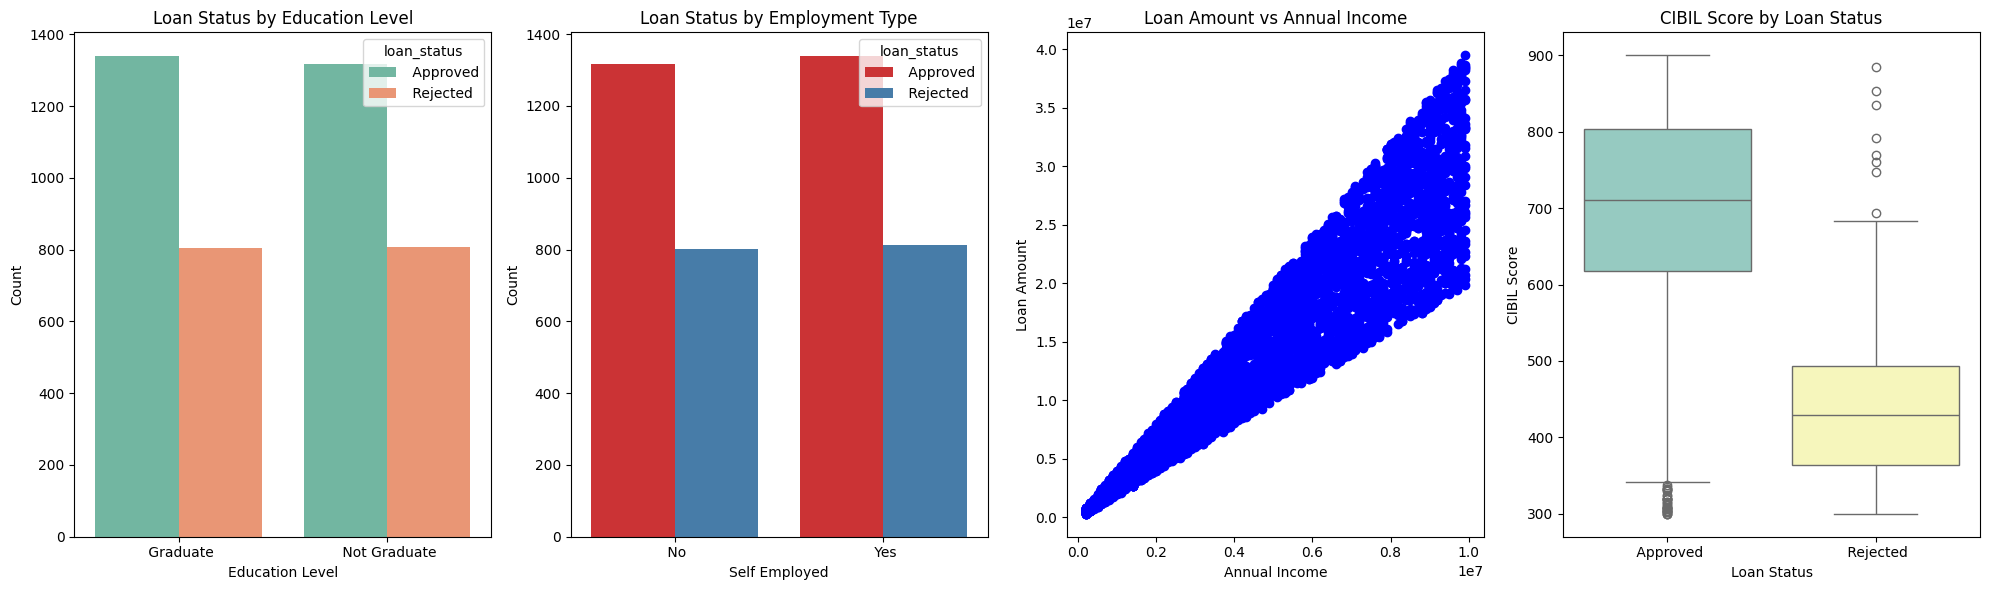

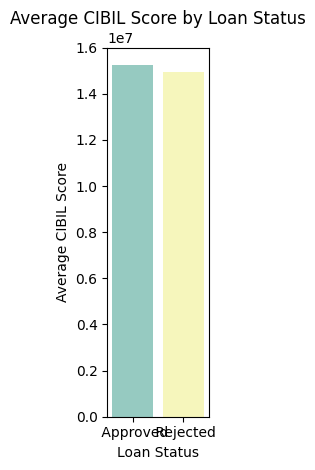

In [ ]:
#Loan Status vs. Education
plt.figure(figsize=(20,6))

plt.subplot(1,4,1)
sns.countplot(x='education', hue='loan_status', data=df, palette='Set2')
plt.title('Loan Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Count')


#Loan Status vs. Self Employed
plt.subplot(1,4,2)
sns.countplot(x='self_employed', hue='loan_status', data=df, palette='Set1')
plt.title('Loan Status by Employment Type')
plt.xlabel('Self Employed')
plt.ylabel('Count')


#Loan Amount vs. Income (Scatter Plot)
plt.subplot(1,4,3)
plt.scatter(df['income_annum'], df['loan_amount'], c='blue')
plt.title('Loan Amount vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')


#Cibil Score vs. Loan Status (Box Plot)
plt.subplot(1,4,4)
sns.boxplot(x='loan_status', y='cibil_score', data=df, palette='Set3')
plt.title('CIBIL Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Score')

plt.tight_layout()
plt.show()

# CIBIL Score vs. Loan Status (Bar Chart)
plt.subplot(1, 4, 4)
sns.barplot(x='loan_status', y='loan_amount', data=df, palette='Set3', ci=None)
plt.title('Average CIBIL Score by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average CIBIL Score')

plt.tight_layout()
plt.show()



# **Interpretation of Bivariate Analysis**

**Loan Status by Education Level:** The countplot indicates a higher likelihood of loan approval for graduates compared to non-graduates. This suggests that education level might be a significant factor in loan approval decisions.

**Loan Status by Employment Type:** The countplot shows a similar distribution of approved and rejected loans for both self-employed and non-self-employed applicants. This implies that employment type might not be a strong predictor of loan approval.

**Loan Amount vs Annual Income:** The scatter plot reveals a positive correlation between annual income and loan amount. Higher-income individuals tend to apply for larger loans, which is an expected trend.

**CIBIL Score by Loan Status:** The boxplot demonstrates that approved loans generally have higher CIBIL scores compared to rejected loans. This highlights the importance of creditworthiness in the loan approval process.

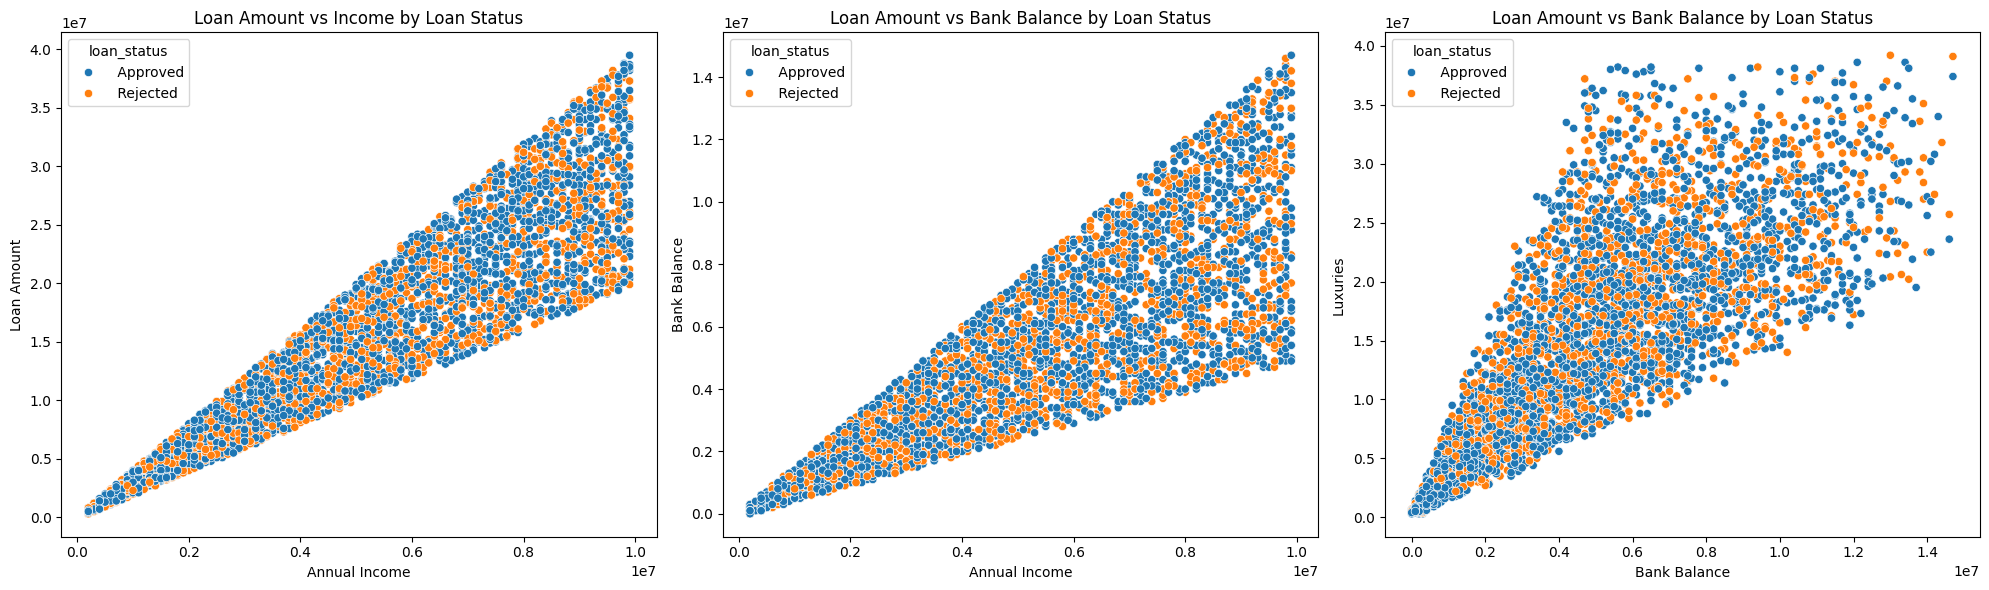

In [ ]:
plt.figure(figsize=(20,6))
# Loan Amount vs Income (Scatter Plot)
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='income_annum', y='loan_amount', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Loan Amount vs Income by Loan Status')


# Loan Amount vs Bank Balance (Scatter Plot)
plt.subplot(1,3,2)
sns.scatterplot(data=df, x='income_annum', y='bank_asset_value', hue='loan_status')
plt.xlabel('Annual Income')
plt.ylabel('Bank Balance')
plt.title('Loan Amount vs Bank Balance by Loan Status')

# Loan Amount vs Bank Balance (Scatter Plot)
plt.subplot(1,3,3)
sns.scatterplot(data=df, x='bank_asset_value', y='luxury_assets_value' , hue='loan_status')
plt.xlabel('Bank Balance')
plt.ylabel('Luxuries ')
plt.title('Loan Amount vs Bank Balance by Loan Status')

plt.tight_layout()
plt.show()

# Correlation Analysis

In [ ]:
# Create a copy of the DataFrame to avoid modifying the original
df_encoded = df.copy()

# Identify categorical variables with object data type
categorical_variables = df_encoded.select_dtypes(include='object').columns.tolist()

# Define label encoder
le = LabelEncoder()

# Encode categorical variables in the copied DataFrame
for variable in categorical_variables:
    df_encoded[variable] = le.fit_transform(df_encoded[variable])

# Verify the encoding
df_encoded.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


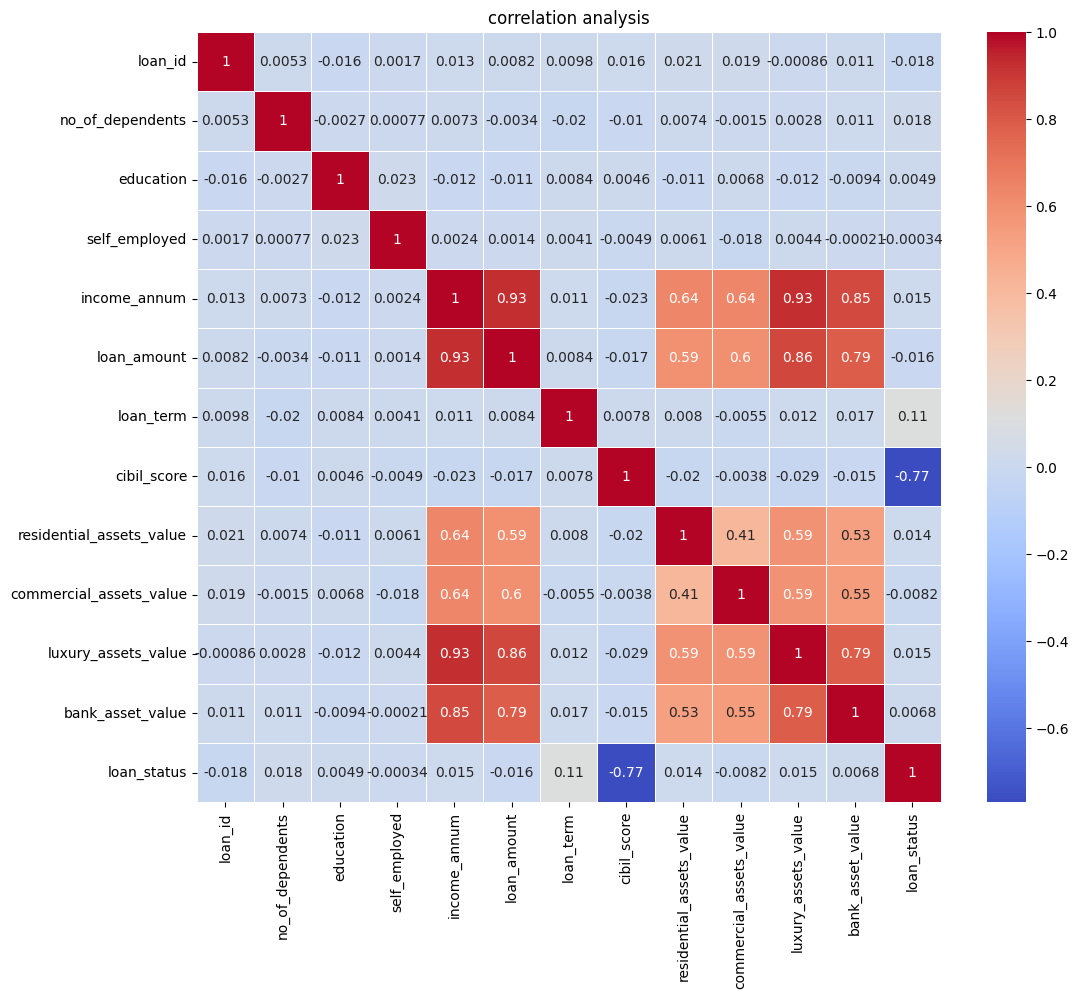

In [ ]:
#copy of dataframe to  avoid modification of the main dataframe
data_copy=df_encoded.copy()

#Encoding of the categorical variables

# data_copy[' education']=data_copy[' education'].map({'Graduate':1,'Not Graduate':0})
# data_copy[' self_employed']=data_copy[' self_employed'].map({'Yes':1,'No':0})
# data_copy[' loan_status']=data_copy[' loan_status'].map({'Approved':1,'Rejected':0})

#correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(data_copy.corr(),annot=True,cmap='coolwarm',linewidths=0.4)
plt.title('correlation analysis')
plt.show()

**Interpretation**

**Positive Correlations:**

 - `loan_amount` and `income_annum`: Strong positive correlation (0.93), indicating that higher income is associated with larger loan amounts.
 - `cibil_score` and `loan_status`: Moderate positive correlation (0.55), suggesting that higher credit scores increase the likelihood of loan approval.
 - `bank_asset_value` and `residential_assets_value`: Moderate positive correlation (0.43), indicating a tendency for individuals with higher bank assets to also have higher residential asset values.
 - `bank_asset_value` and `commercial_assets_value`: Weak positive correlation (0.33), suggesting some association between bank assets and commercial asset values.


 **Negative Correlations:**

 - `loan_amount` and `cibil_score`: Weak negative correlation (-0.12), implying a slight tendency for larger loan amounts to be associated with lower credit scores.
 - `education` and `self_employed`: Weak negative correlation (-0.13), suggesting a slight tendency for graduates to be less likely to be self-employed.


 **Key Insights:**

 - Income is a strong predictor of loan amount.
 - Credit score is a significant factor in loan approval decisions.
 - There's a relationship between an individual's bank assets and their residential and commercial asset values.

# Hypothesis Test

**Hypothesis Definition**

***Null Hypothesis (H0):*** There is no difference in the mean CIBIL score between approved and rejected loans. This means that higher CIBIL scores do not significantly influence the likelihood of loan approval.

***Alternative Hypothesis (H1):*** There is a difference in the mean CIBIL score between approved and rejected loans. This suggests that higher CIBIL scores are significantly associated with a higher likelihood of loan approval.

***The significance level*** for the test is set at 0.05 (5%).

In [ ]:
from scipy import stats

# Using df_encoded with encoded categorical variables

# Extract CIBIL scores for approved and rejected loans
cibil_approved = df_encoded[df_encoded['loan_status'] == 0]['cibil_score']
cibil_rejected = df_encoded[df_encoded['loan_status'] == 1]['cibil_score']

# Extract Loan Amount scores for approved and rejected loans
ln_approved = df_encoded[df_encoded['loan_status'] == 0]['loan_amount']
ln_rejected = df_encoded[df_encoded['loan_status'] == 1]['loan_amount']



# Perform the T-Test
t_statistic, p_value = stats.ttest_ind(cibil_approved, cibil_rejected, equal_var=False)

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Higher CIBIL scores are significantly associated with a higher likelihood of loan approval.")
else:
    print("Fail to reject the null hypothesis: There is no significant relationship between CIBIL scores and loan approval status.")


T-Statistic: 87.8963455604719
P-Value: 0.0
Reject the null hypothesis: Higher CIBIL scores are significantly associated with a higher likelihood of loan approval.


**Test Results:**

T-Statistic: 87.896

P-Value: 0.0

**Reject the null hypothesis:** Higher CIBIL scores are significantly associated with a higher likelihood of loan approval.

<Figure size 1400x600 with 0 Axes>

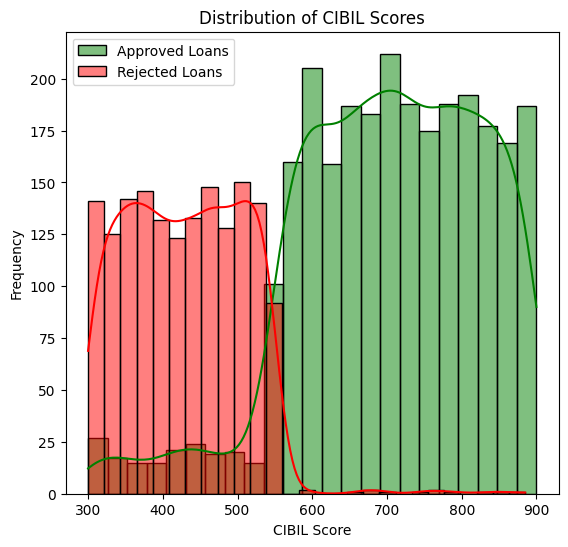

<Figure size 1400x600 with 0 Axes>

In [ ]:
# Visualization
plt.figure(figsize=(14, 6))

# Histogram of CIBIL Scores
plt.subplot(1, 2, 1)
sns.histplot(cibil_approved, color='green', kde=True, label='Approved Loans')
sns.histplot(cibil_rejected, color='red', kde=True, label='Rejected Loans')
plt.title('Distribution of CIBIL Scores')
plt.xlabel('CIBIL Score')
plt.ylabel('Frequency')
plt.legend()

# Visualization
plt.figure(figsize=(14, 6))

**Interpretation:**

The histograms show that approved loans have a right-skewed distribution of CIBIL scores, indicating most approved loans are associated with higher scores. In contrast, rejected loans have a left-skewed distribution, with a concentration of lower CIBIL scores. This skewness highlights that higher CIBIL scores are more common among approved loans. The statistical analysis confirms this trend, showing a strong link between higher CIBIL scores and increased likelihood of loan approval.

# MODEL IMPLEMENTATION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc


##Feature selection

In [ ]:
def data_preproc(df_path):
  """

  This function include data load, data cleaning and label encoder

  Input: df_path wich is the path to the raw dataset

  Output: normalized X and y ready to train the model with

  """

  df = pd.read_csv(df_path)


  new_columns = [x.strip() for x in df.columns]
  df.columns = new_columns
  # label encoding
  categorical_variables = df.select_dtypes(include='object').columns.tolist()
  # categorical_variables


  # define label encoder
  le = LabelEncoder()


  # encode categorical variables
  for variable in categorical_variables:
    df[variable] = le.fit_transform(df[variable])


  y = df["loan_status"]
  X = df.drop(columns=["loan_status","loan_id"],axis=1)

  scaler = StandardScaler()
  X_scaled = scaler.fit_transform(X)

  return X ,y

In [ ]:
# Load dataset

X,y = data_preproc("https://raw.githubusercontent.com/Gladie34/iip/main/Capstone%20project.csv")

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
result = logit_model.fit()

# Get the p-values for each feature
p_values = result.pvalues

# Display the summary with p-values
print(result.summary())

# Set significance level
significance_level = 0.05

# Select features with p-value below the significance level
significant_features = p_values[p_values <= significance_level]
print("\nSignificant features based on p-value:")
print(significant_features)

Optimization terminated successfully.
         Current function value: 0.219924
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            loan_status   No. Observations:                 4269
Model:                          Logit   Df Residuals:                     4257
Method:                           MLE   Df Model:                           11
Date:                Thu, 03 Oct 2024   Pseudo R-squ.:                  0.6683
Time:                        18:23:24   Log-Likelihood:                -938.86
converged:                       True   LL-Null:                       -2830.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       11.3077      0.438     25.833      0.000      10.450

# Model Building

In [ ]:
def data_train(model,X_train, X_test , y_train , y_test):

  model.fit(X_train,y_train)
  pred0 = model.predict(X_train)
  score0 = roc_auc_score(pred0,y_train)
  print(f"AUC on the train  = {score0}")
  pred = model.predict(X_test)
  scores = roc_auc_score(pred,y_test)
  print(f"AUC on the test = {scores}")
  print("\n")
  # print the accuracy score, precision, f1 score and recall for all the models
  print("----------------------------------------------------------------------------------------------------------------")
  print(f"Accuracy Score, Precision, F1 Score and Recall for {model}")
  print("----------------------------------------------------------------------------------------------------------------")
  print(f"Accuracy: {accuracy_score(y_test, pred)}")
  print(f"{'-' * 30}")
  print(f"Precision: {precision_score(y_test, pred)}")
  print(f"{'-' * 30}")
  print(f"F1 Score: {f1_score(y_test, pred)}")
  print(f"{'-' * 30}")
  print(f"Recall: {recall_score(y_test, pred)}")
  print(f"{'-' * 30}")
  print("\n")
  print("----------------------------------------------------------------------------------------------------------------")
  print(f"Classification Report for {model}")
  print("----------------------------------------------------------------------------------------------------------------")
  report = classification_report(y_test, pred)
  print(report)

  # plot the confusion matrix
  print("----------------------------------------------------------------------------------------------------------------")
  print(f"Confusion Matrix for {model}")
  print("----------------------------------------------------------------------------------------------------------------")
  cm = confusion_matrix(y_test, pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()
  print("----------------------------------------------------------------------------------------------------------------")
  print(f"ROC Curve for {model}")
  print("----------------------------------------------------------------------------------------------------------------")
  # Plot ROC curve
  # Compute ROC curve and ROC area
  fpr, tpr, _ = roc_curve(y_test, pred)
  roc_auc = auc(fpr, tpr)
  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
  plt.fill_between(fpr, tpr, color='lightblue', alpha=0.4)  # Fill the AUC area with color
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

In [ ]:
X,y = data_preproc("https://raw.githubusercontent.com/Gladie34/iip/main/Capstone%20project.csv")
X_train, X_test , y_train , y_test = train_test_split(X ,y,test_size=0.2,random_state=42)

In [ ]:
list_models = {"LogisticRegression":LogisticRegression(),
               "RandomForestClassifier":RandomForestClassifier(n_estimators=100, random_state=42),
               "lgb.LGBMClassifier":lgb.LGBMClassifier(verbosity = -1),
               "xgb.XGBClassifier":xgb.XGBClassifier(),
              #  "SVC":SVC(),
               "KNeighborsClassifier":KNeighborsClassifier(),
               "DecisionTreeClassifier":DecisionTreeClassifier(),
               "Naive Bayes":GaussianNB(),
               "MLPClassifier":MLPClassifier(),


              }
list_models

{'LogisticRegression': LogisticRegression(),
 'RandomForestClassifier': RandomForestClassifier(random_state=42),
 'lgb.LGBMClassifier': LGBMClassifier(verbosity=-1),
 'xgb.XGBClassifier': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=None, n_jobs=None,
               num_parallel_tree=None, random_state=None, ...),
 'KNeighborsClassifier': KNeighborsClassifi





----------------------------------------------------------------------------------------------------------------
Training of LogisticRegression
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
AUC on the train  = 0.7559420016651743
AUC on the test = 0.7575458392101552


----------------------------------------------------------------------------------------------------------------
Accuracy Score, Precision, F1 Score and Recall for LogisticRegression()
----------------------------------------------------------------------------------------------------------------
Accuracy: 0.7295081967213115
------------------------------
Precision: 0.8
------------------------------
F1 Score: 0.5010799136069114
------------------------------
Recall: 0.36477987421383645
------------------------------


-----------------------

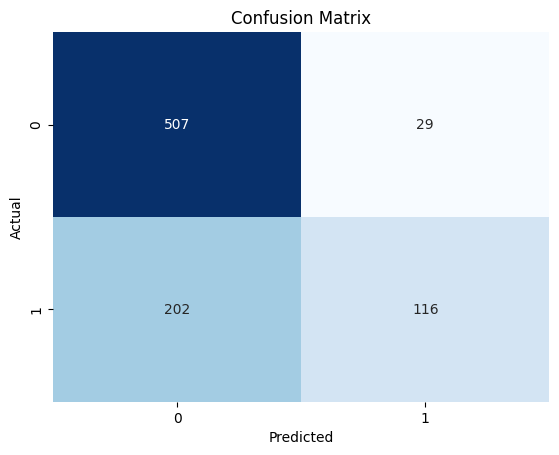

----------------------------------------------------------------------------------------------------------------
ROC Curve for LogisticRegression()
----------------------------------------------------------------------------------------------------------------


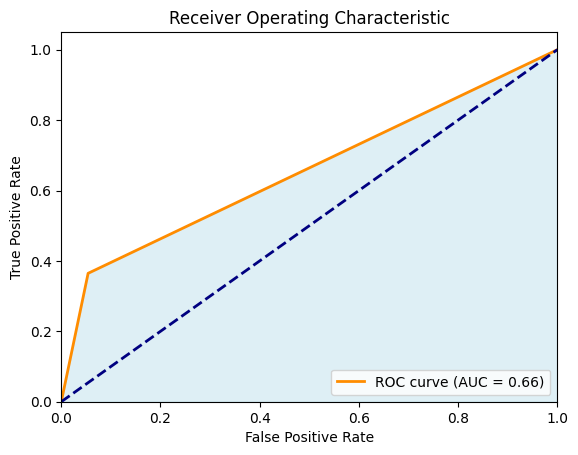

----------------------------------------------------------------------------------------------------------------
End of training of LogisticRegression
----------------------------------------------------------------------------------------------------------------




----------------------------------------------------------------------------------------------------------------
Training of RandomForestClassifier
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
AUC on the train  = 1.0
AUC on the test = 0.9777273183608629


----------------------------------------------------------------------------------------------------------------
Accuracy Score, Precision, F1 Score and Recall for RandomForestClassifier(random_state=42)
-------------------------------------------------------------------------------------------

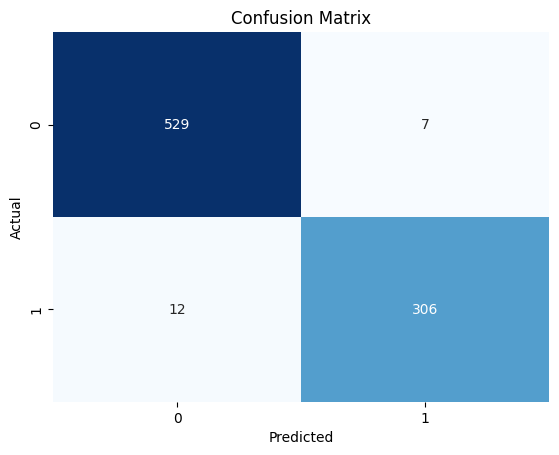

----------------------------------------------------------------------------------------------------------------
ROC Curve for RandomForestClassifier(random_state=42)
----------------------------------------------------------------------------------------------------------------


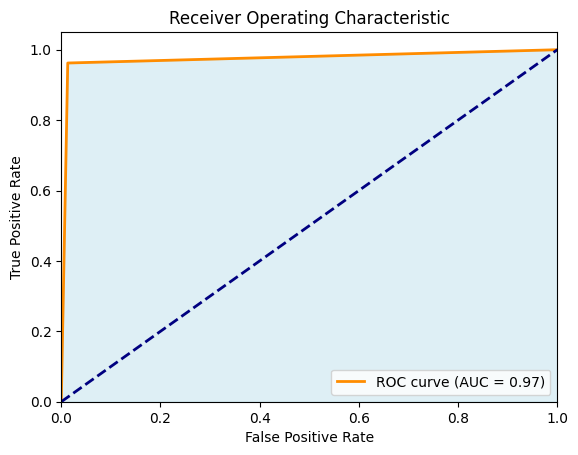

----------------------------------------------------------------------------------------------------------------
End of training of RandomForestClassifier
----------------------------------------------------------------------------------------------------------------




----------------------------------------------------------------------------------------------------------------
Training of lgb.LGBMClassifier
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
AUC on the train  = 1.0
AUC on the test = 0.9827706353752664


----------------------------------------------------------------------------------------------------------------
Accuracy Score, Precision, F1 Score and Recall for LGBMClassifier(verbosity=-1)
------------------------------------------------------------------------------------------------------

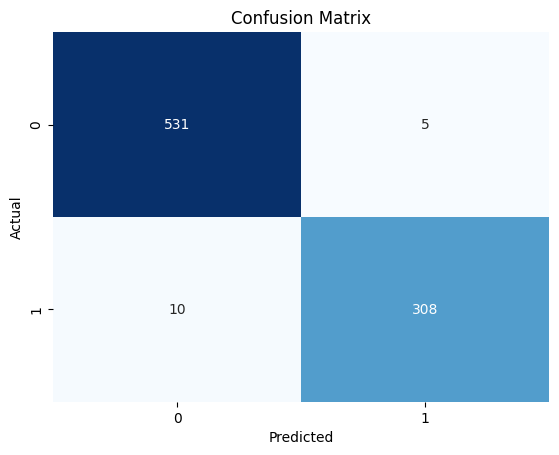

----------------------------------------------------------------------------------------------------------------
ROC Curve for LGBMClassifier(verbosity=-1)
----------------------------------------------------------------------------------------------------------------


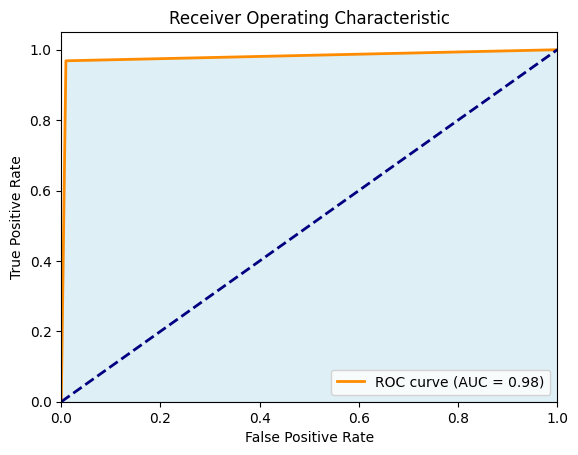

----------------------------------------------------------------------------------------------------------------
End of training of lgb.LGBMClassifier
----------------------------------------------------------------------------------------------------------------




----------------------------------------------------------------------------------------------------------------
Training of xgb.XGBClassifier
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
AUC on the train  = 1.0
AUC on the test = 0.9821273964131108


----------------------------------------------------------------------------------------------------------------
Accuracy Score, Precision, F1 Score and Recall for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              

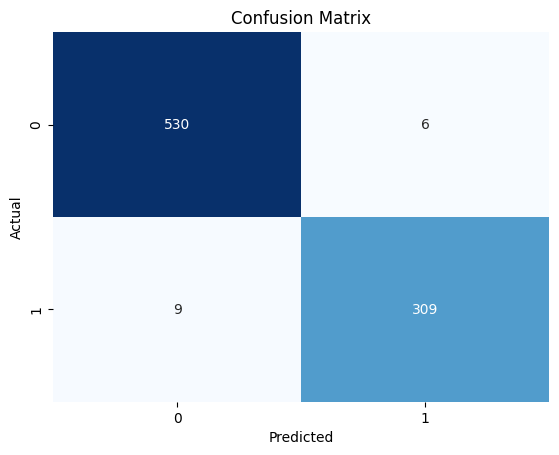

----------------------------------------------------------------------------------------------------------------
ROC Curve for XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
----------------------------------------------------------------------------------------------------------------


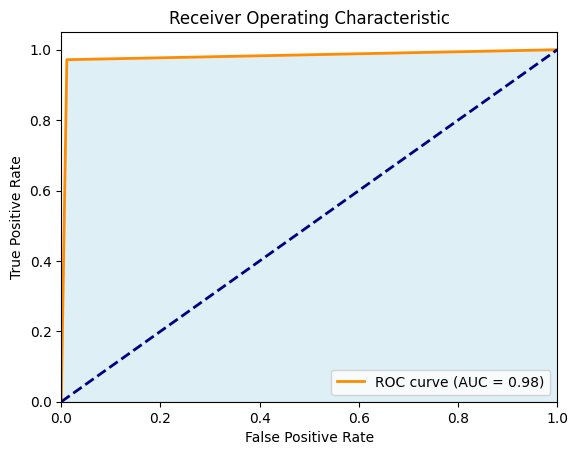

----------------------------------------------------------------------------------------------------------------
End of training of xgb.XGBClassifier
----------------------------------------------------------------------------------------------------------------




----------------------------------------------------------------------------------------------------------------
Training of KNeighborsClassifier
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
AUC on the train  = 0.706984991157653
AUC on the test = 0.5242349083571549


----------------------------------------------------------------------------------------------------------------
Accuracy Score, Precision, F1 Score and Recall for KNeighborsClassifier()
-------------------------------------------------------------------------------------------------

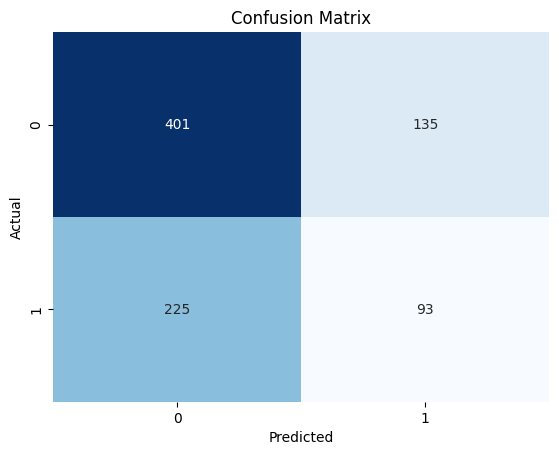

----------------------------------------------------------------------------------------------------------------
ROC Curve for KNeighborsClassifier()
----------------------------------------------------------------------------------------------------------------


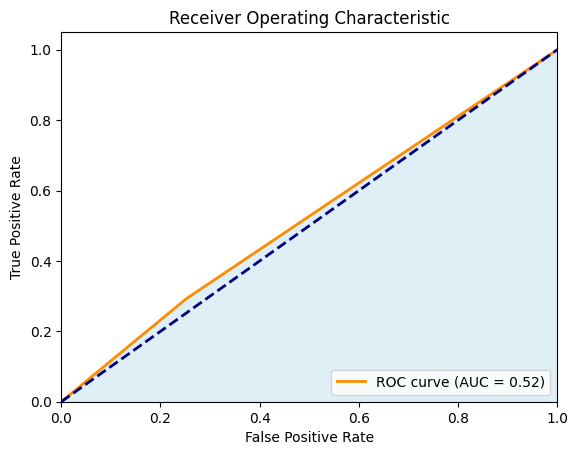

----------------------------------------------------------------------------------------------------------------
End of training of KNeighborsClassifier
----------------------------------------------------------------------------------------------------------------




----------------------------------------------------------------------------------------------------------------
Training of DecisionTreeClassifier
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
AUC on the train  = 1.0
AUC on the test = 0.9749229127134725


----------------------------------------------------------------------------------------------------------------
Accuracy Score, Precision, F1 Score and Recall for DecisionTreeClassifier()
--------------------------------------------------------------------------------------------------------

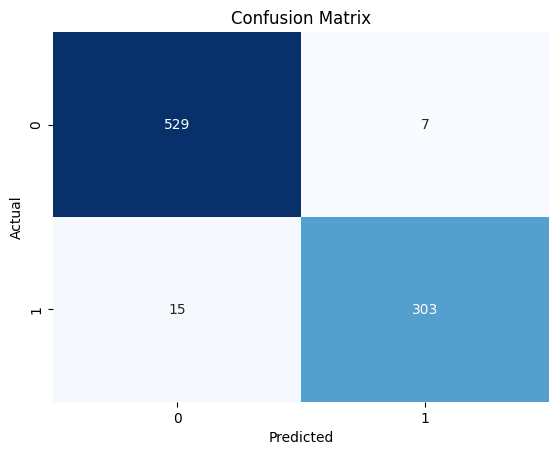

----------------------------------------------------------------------------------------------------------------
ROC Curve for DecisionTreeClassifier()
----------------------------------------------------------------------------------------------------------------


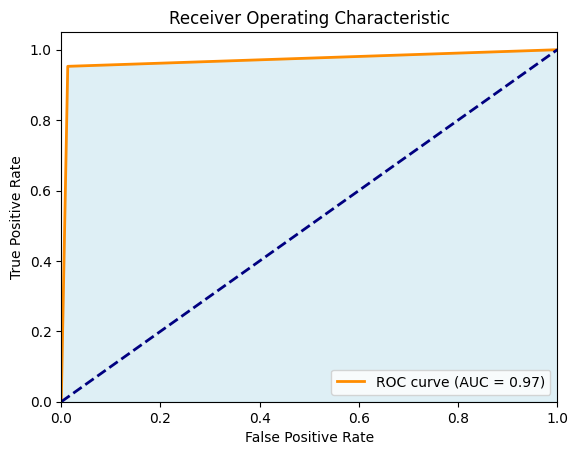

----------------------------------------------------------------------------------------------------------------
End of training of DecisionTreeClassifier
----------------------------------------------------------------------------------------------------------------




----------------------------------------------------------------------------------------------------------------
Training of Naive Bayes
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
AUC on the train  = 0.8194391979648322
AUC on the test = 0.8297635886037583


----------------------------------------------------------------------------------------------------------------
Accuracy Score, Precision, F1 Score and Recall for GaussianNB()
--------------------------------------------------------------------------------------------------------------

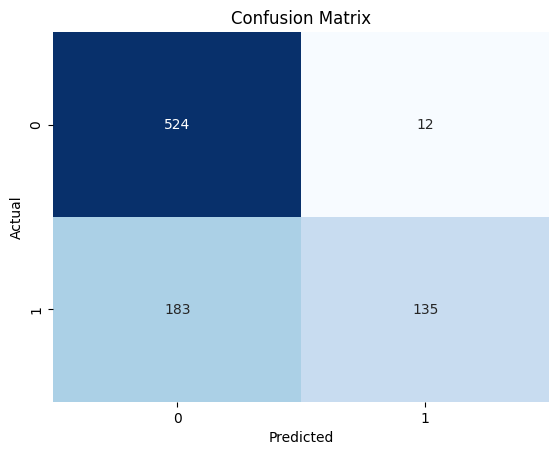

----------------------------------------------------------------------------------------------------------------
ROC Curve for GaussianNB()
----------------------------------------------------------------------------------------------------------------


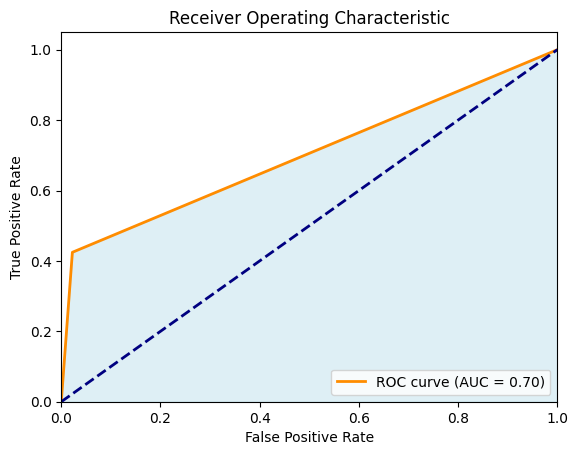

----------------------------------------------------------------------------------------------------------------
End of training of Naive Bayes
----------------------------------------------------------------------------------------------------------------




----------------------------------------------------------------------------------------------------------------
Training of MLPClassifier
----------------------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------------------
AUC on the train  = 0.5651101444990001
AUC on the test = 0.5416262266796075


----------------------------------------------------------------------------------------------------------------
Accuracy Score, Precision, F1 Score and Recall for MLPClassifier()
----------------------------------------------------------------------------------------------------------------
Acc

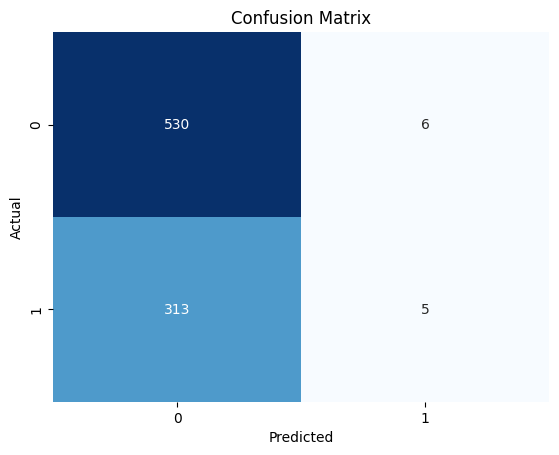

----------------------------------------------------------------------------------------------------------------
ROC Curve for MLPClassifier()
----------------------------------------------------------------------------------------------------------------


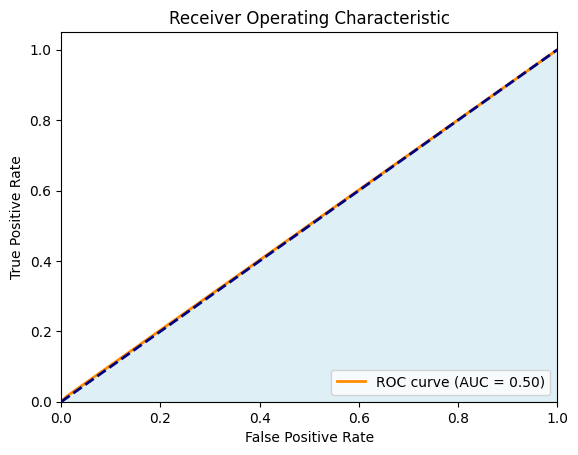

----------------------------------------------------------------------------------------------------------------
End of training of MLPClassifier
----------------------------------------------------------------------------------------------------------------


In [ ]:
from typing_extensions import final
for name,model in list_models.items():
  print("\n\n\n")
  print("----------------------------------------------------------------------------------------------------------------")
  print(f"Training of {name}")
  print("----------------------------------------------------------------------------------------------------------------")
  print("----------------------------------------------------------------------------------------------------------------")
  final_pred = data_train(model, X_train, X_test, y_train, y_test)
  print("----------------------------------------------------------------------------------------------------------------")
  print(f"End of training of {name}")
  print("----------------------------------------------------------------------------------------------------------------")






# **Model Comparison**



In [ ]:

# Create an empty DataFrame to store the results
table = pd.DataFrame()

# Add KNeighborsClassifier results
table = pd.concat([table, pd.DataFrame({'Model': "KNeighborsClassifier",
                        'F1': 0.340659,
                        'Recall': 0.292453,
                        'Precision': 0.407895,
                        'Accuracy': 0.578454
                      }, index=[0])], ignore_index=True)

# Add MLPClassifier results
table = pd.concat([table, pd.DataFrame({'Model': "MLPClassifier",
                        'F1': 0.355805,
                        'Recall': 0.298742,
                        'Precision': 0.439815,
                        'Accuracy': 0.597190
                      }, index=[0])], ignore_index=True)

# Add Logistic Regression results
table = pd.concat([table, pd.DataFrame({'Model': "Logistic Regression",
                        'F1': 0.012461,
                        'Recall': 0.006289,
                        'Precision': 0.666667,
                        'Accuracy': 0.628806
                      }, index=[0])], ignore_index=True)

# Add Naive Bayes results
table = pd.concat([table, pd.DataFrame({'Model': "Naive Bayes",
                        'F1': 0.580645,
                        'Recall': 0.424528,
                        'Precision': 0.918367,
                        'Accuracy': 0.771663
                      }, index=[0])], ignore_index=True)

# Add Decision Tree results
table = pd.concat([table, pd.DataFrame({'Model': "Decision Tree",
                        'F1': 0.963665,
                        'Recall': 0.959119,
                        'Precision': 0.968254,
                        'Accuracy': 0.973068
                      }, index=[0])], ignore_index=True)

# Add Random Forest results
table = pd.concat([table, pd.DataFrame({'Model': "Random Forest",
                        'F1': 0.969889,
                        'Recall': 0.962264,
                        'Precision': 0.977636,
                        'Accuracy': 0.977752
                      }, index=[0])], ignore_index=True)

# Add LGBMClassifier results
table = pd.concat([table, pd.DataFrame({'Model': "LGBMClassifier",
                        'F1': 0.976228,
                        'Recall': 0.968553,
                        'Precision': 0.984026,
                        'Accuracy': 0.982436
                      }, index=[0])], ignore_index=True)


# Add XGBoost results
table = pd.concat([table, pd.DataFrame({'Model': "XGBoost",
                        'F1': 0.976303,
                        'Recall': 0.971698,
                        'Precision': 0.980952,
                        'Accuracy': 0.982436
                      }, index=[0])], ignore_index=True)




# Display the table
table


,Model,F1,Recall,Precision,Accuracy
0,KNeighborsClassifier,0.340659,0.292453,0.407895,0.578454
1,MLPClassifier,0.355805,0.298742,0.439815,0.597190
2,Logistic Regression,0.012461,0.006289,0.666667,0.628806
3,Naive Bayes,0.580645,0.424528,0.918367,0.771663
4,Decision Tree,0.963665,0.959119,0.968254,0.973068
5,Random Forest,0.969889,0.962264,0.977636,0.977752
6,LGBMClassifier,0.976228,0.968553,0.984026,0.982436
7,XGBoost,0.976303,0.971698,0.980952,0.982436


## **Best-Performing Model: The XGB Model**

Reason for Choosing XGBoost:

**Highest Accuracy:** XGBoost has one of the highest accuracy scores (0. 982436), indicating that it correctly predicts a large proportion of the test set instances.

**High Precision and Recall:** XGBoost maintains a balance between precision (0.980952) and recall (0.971698). High precision means that when XGBoost predicts a positive class, it is usually correct, and high recall indicates that it captures most of the actual positive instances.

**Best F1 Score:** The F1 score (0.976303) is a crucial metric that balances precision and recall, especially when the data is imbalanced. XGBoost has the highest F1 score among the models, meaning it is the best at maintaining a balance between precision and recall.

## **Examining the Important Features in our Models**

Plotting the Important Features  for LogisticRegression Model ...


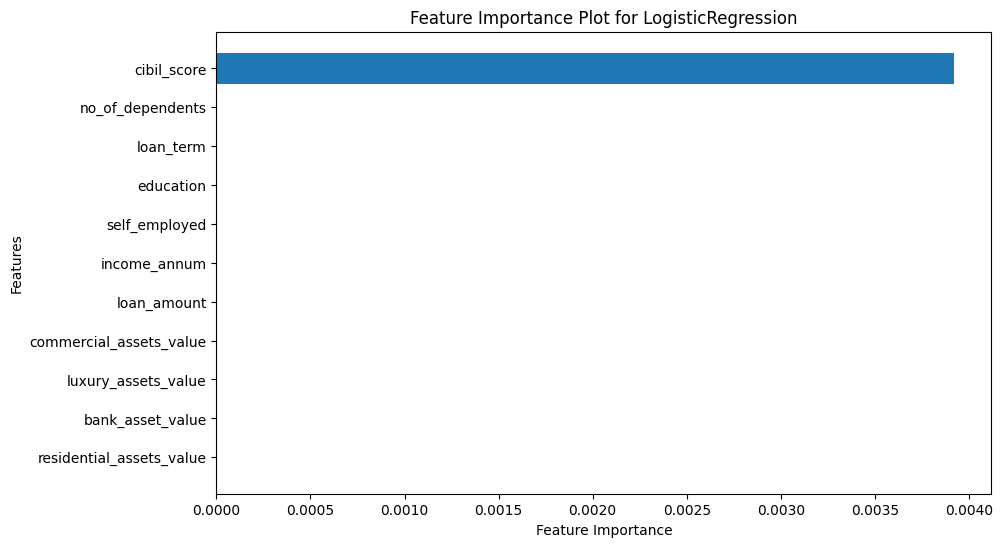

Plotting the Important Features  for RandomForestClassifier Model ...


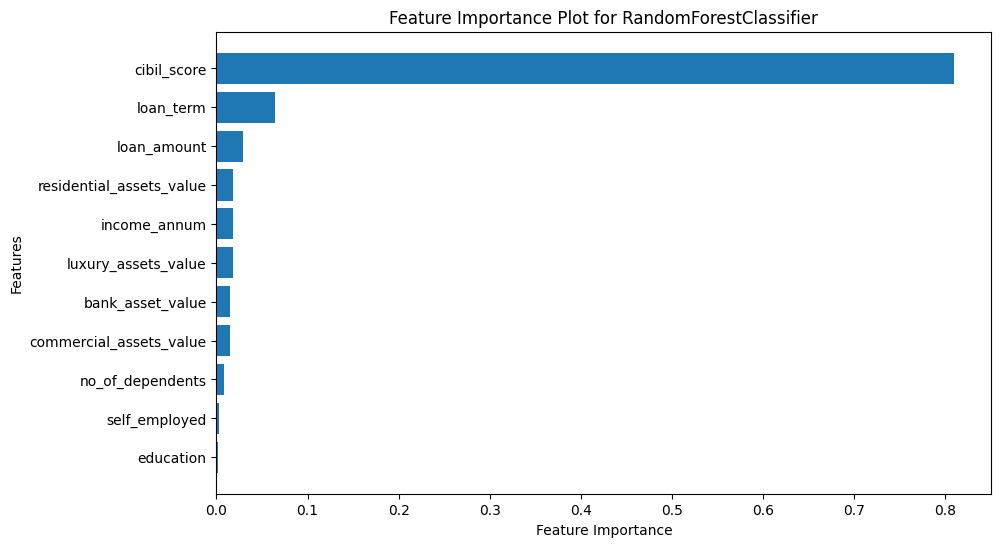

Plotting the Important Features  for lgb.LGBMClassifier Model ...


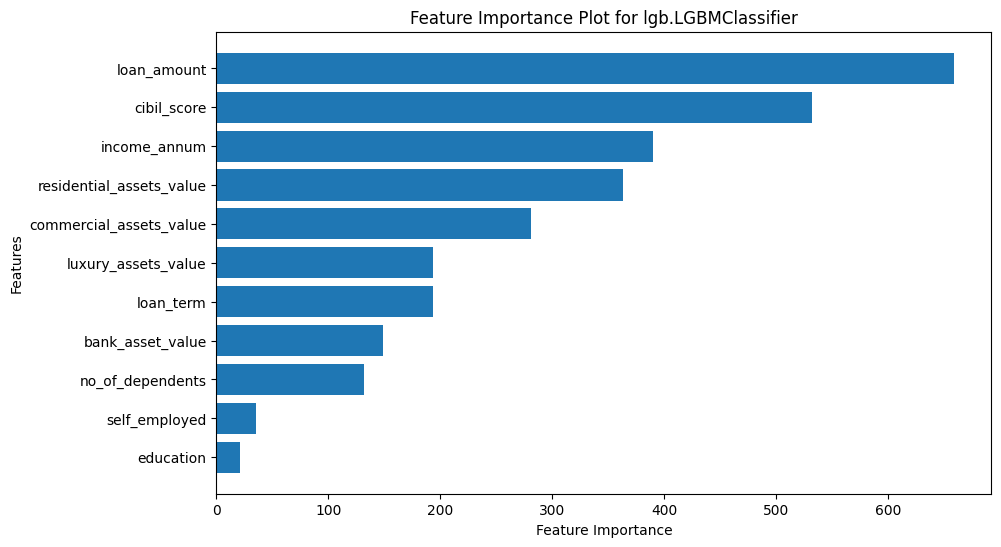

Plotting the Important Features  for xgb.XGBClassifier Model ...


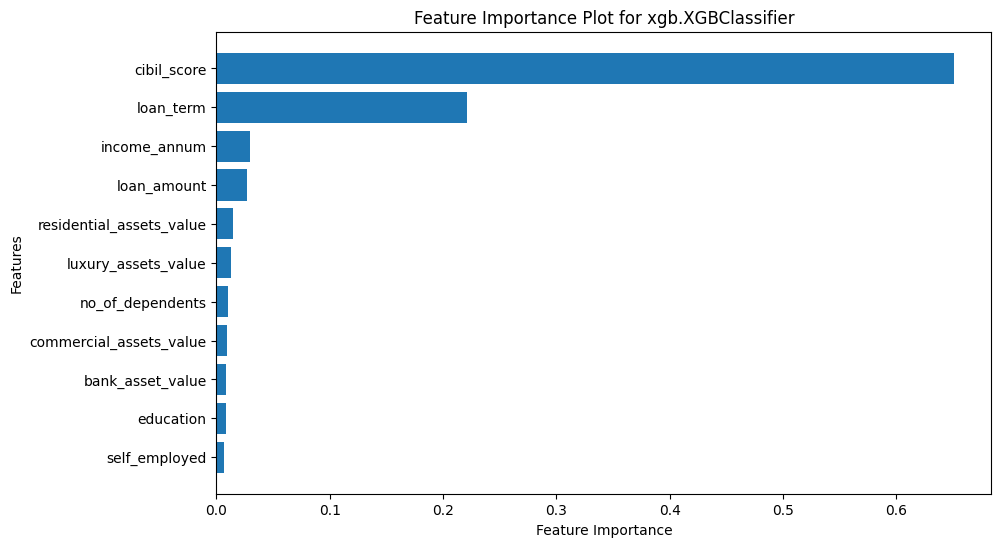

Plotting the Important Features  for KNeighborsClassifier Model ...


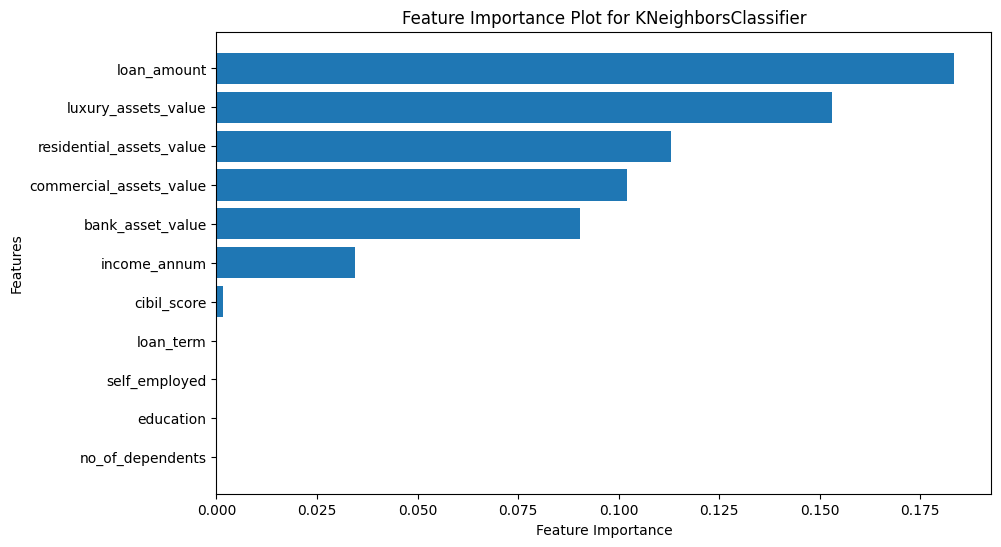

Plotting the Important Features  for DecisionTreeClassifier Model ...


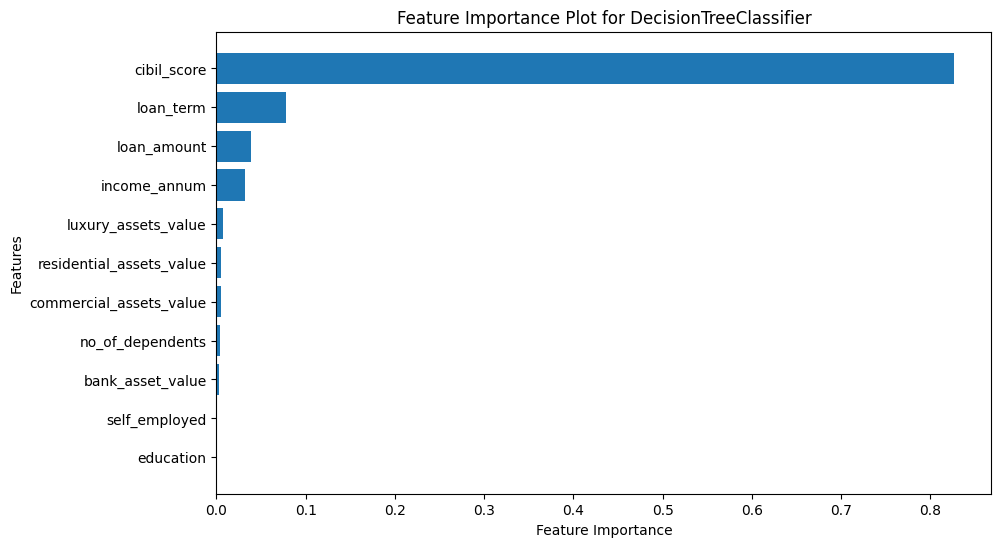

Plotting the Important Features  for Naive Bayes Model ...


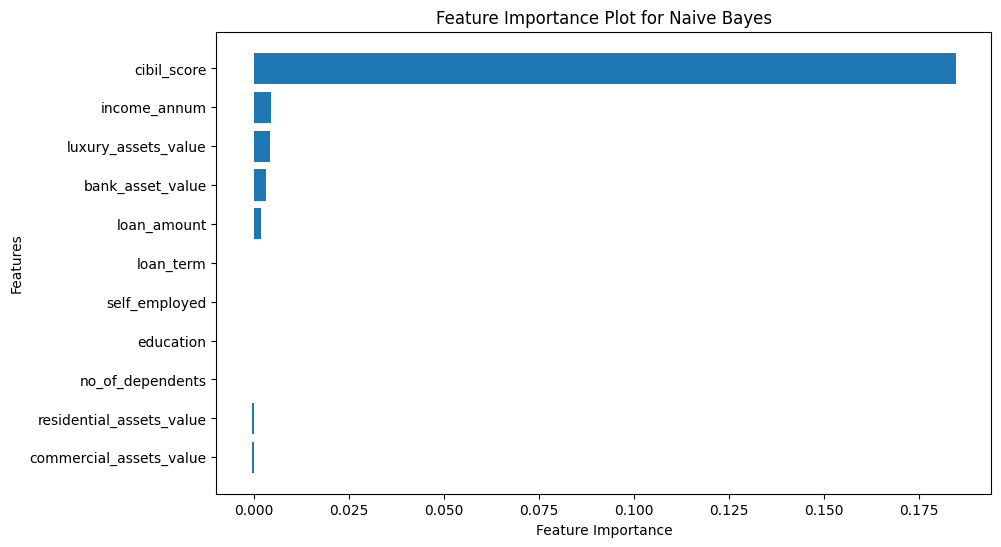

Plotting the Important Features  for MLPClassifier Model ...


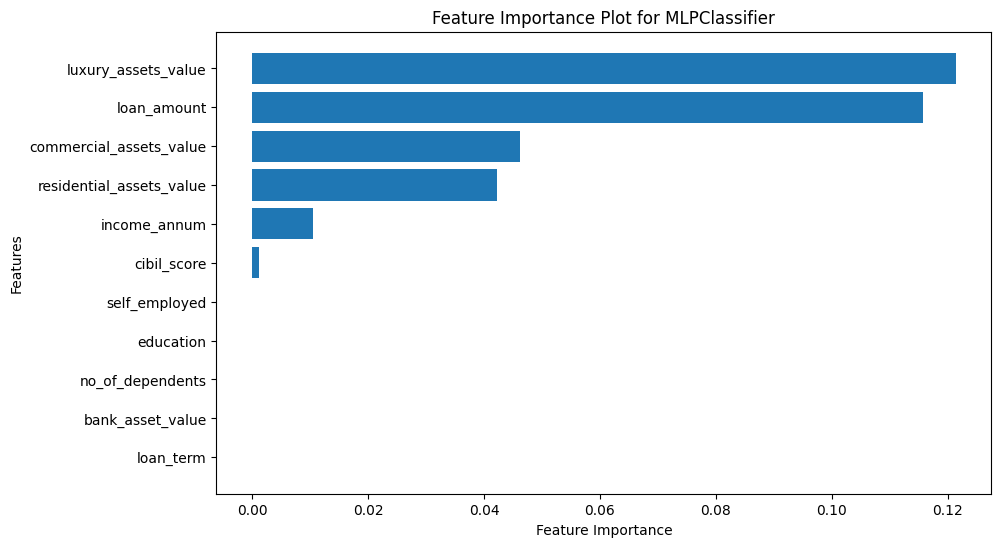

In [ ]:

from sklearn.inspection import permutation_importance

def plot_feature_importance(model, X, y, model_name):
    """
    Plots the feature importance for a given model, ensuring the plot is in descending order.
    """
    if hasattr(model, 'feature_importances_'):
        # Tree-based models
        importances = model.feature_importances_
    elif hasattr(model, 'coef_'):
        # For linear models like Logistic Regression
        importances = np.abs(model.coef_[0])
    else:
        # For models that don't have a direct way to calculate feature importance
        # Use permutation importance as a fallback
        result = permutation_importance(model, X, y, n_repeats=10, random_state=42, n_jobs=-1)
        importances = result.importances_mean

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]
    features = X.columns[indices]
    importances_sorted = importances[indices]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(importances_sorted)), importances_sorted, align='center')
    plt.yticks(range(len(importances_sorted)), features)
    plt.xlabel('Feature Importance')
    plt.ylabel('Features')
    plt.title(f'Feature Importance Plot for {model_name}')
    plt.gca().invert_yaxis()  # To ensure the most important feature is at the top
    plt.show()

# Now apply the function to each model
for model_name, model in list_models.items():
    print(f"Plotting the Important Features  for {model_name} Model ...")
    model.fit(X_train, y_train)
    plot_feature_importance(model, X_train, y_train, model_name)


**Hyperparameter Tuning for the Models**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grids for each model
param_grids = {
    'LogisticRegression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'solver': ['liblinear', 'saga'],
        'penalty': ['l1', 'l2']
    },
    'RandomForestClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    'lgb.LGBMClassifier': {
        'num_leaves': [31, 50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200]
    },
    'xgb.XGBClassifier': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan', 'minkowski']
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'Naive Bayes': {},  # No hyperparameters to tune for GaussianNB
    'MLPClassifier': {
        'hidden_layer_sizes': [(50,), (100,), (50, 50)],
        'activation': ['tanh', 'relu'],
        'solver': ['sgd', 'adam'],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate': ['constant', 'adaptive']
    }
}

# Initialize a dictionary to hold the best models
best_models = {}

# Perform hyperparameter tuning for each model
for model_name, model in list_models.items():
    print(f"Tuning hyperparameters for {model_name}...")

    if model_name in param_grids and param_grids[model_name]:
        # Initialize RandomizedSearchCV
        random_search = RandomizedSearchCV(model,
                                           param_grids[model_name],
                                           n_iter=10,
                                           scoring='accuracy',
                                           cv=5,
                                           random_state=42,
                                           n_jobs=-1)

        # Fit the model
        random_search.fit(X_train, y_train)

        # Store the best model
        best_models[model_name] = random_search.best_estimator_

        # Print the best parameters and the corresponding score
        print("----------------------------------------------------------------------------------------------------------------")
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best cross-validated score: {random_search.best_score_}\n")
        print("----------------------------------------------------------------------------------------------------------------")
    else:
        # If no hyperparameter grid is specified (e.g., Naive Bayes), just fit the model
        model.fit(X_train, y_train)
        best_models[model_name] = model



Tuning hyperparameters for LogisticRegression...
----------------------------------------------------------------------------------------------------------------
Best parameters for LogisticRegression: {'solver': 'liblinear', 'penalty': 'l1', 'C': 100}
Best cross-validated score: 0.9183016105417277

----------------------------------------------------------------------------------------------------------------
Tuning hyperparameters for RandomForestClassifier...
----------------------------------------------------------------------------------------------------------------
Best parameters for RandomForestClassifier: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': False}
Best cross-validated score: 0.9806734992679356

----------------------------------------------------------------------------------------------------------------
Tuning hyperparameters for lgb.LGBMClassifier...
-------------------------------------------------------------

**Evaluating the Tuned Models**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, classification_report
import pandas as pd

# Initialize a DataFrame to store results
tuned_results_table = pd.DataFrame(columns=["Model", "Accuracy", "Precision", "F1", "Recall"])

# Evaluate each tuned model
for model_name, model in best_models.items():
    print(f"Evaluating {model_name}...")

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    # Print the classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    # Store the results in the DataFrame
    tuned_results_table = pd.concat([tuned_results_table, pd.DataFrame({
        "Model": [model_name],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "F1": [f1],
        "Recall": [recall]
    })], ignore_index=True)

# Display the comparison table
print("\nTuned Model Comparison Table:")
print(tuned_results_table)


Evaluating LogisticRegression...
Classification Report for LogisticRegression:

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       536
           1       0.88      0.86      0.87       318

    accuracy                           0.91       854
   macro avg       0.90      0.90      0.90       854
weighted avg       0.90      0.91      0.90       854

Evaluating RandomForestClassifier...
Classification Report for RandomForestClassifier:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       536
           1       0.98      0.97      0.97       318

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

Evaluating lgb.LGBMClassifier...
Classification Report for lgb.LGBMClassifier:

              precision    recall  f1-score   support

           0       0.98      0.99      0.99

# Conclusion

In conclusion, implementing the predictive loan approval model will streamline decision-making, reduce risk, and enhance customer satisfaction by accurately assessing key factors like credit score, income, assets, and loan amount. This strategic adoption will not only improve operational efficiency but also position the institution for sustained growth and competitiveness in the financial market.